---
안녕하세요 [Mulcamer] 팀입니다.

첫 번째 단계로 plotly와 tableu를 활용한 EDA와 시각화를 진행했습니다. [EDA 게시글 참조](https://dacon.io/competitions/official/235590/codeshare/1032?page=1&dtype=recent) 분석 내용을 바탕으로 데이터의 특징과 코로나에 대한 분석 방향을 모색했습니다.

이번 포스팅에서는 <br><h2>20대의 감염 원인과 행동 패턴</h2></br>
에 대해서 알아보았습니다.

유익하고 재밌으셨다면 투표한번씩 부탁드립니다. ^=^  

감사합니다.

---

## 이전 글 
### [Version_1 : Tableau & Plotly 활용 전반적 EDA 와 시각화](https://dacon.io/competitions/official/235590/codeshare/1032?page=1&dtype=recent)

---

### Update 
(4월 22일) COVID-19 Plotly를 사용한 전반적 EDA

(4월 23일) 시간에 따른 세계 확진자 추이 TABLEU

(4월 24일) 시간에 따른 한국 확진자 추이 TABLEU

(4월 26일) EDA 결과 및 특징을 통한 분석 방향 확립

(4월 29일) 1차 분석 : 20대 감염 원인과 성향

---

# 분석글

기존 EDA를 통해서 연령별 누적 확진자 추이를 보면 20대의 확진자 비율이 매우 높은 것을 확인할 수 있습니다. 뿐만 아니라, 꾸준히 연령별 확진자 추이가 지속되는 것을 확인했습니다. 그리하여, 연령대별 특징이나 행동특성이 코로나 감염과의 관계가 있을 것이라고 생각하여 `20대 감염자 어디서 왔는가?!`라는 주제로 분석을 진행해보았습니다.


# 결론 및 요약
코로나 종식 및 예방을 위해서는 가장 많은 감염자 수를 가진 20대 감염자의 수를 줄이는 것이 핵심이라고 생각하였습니다. 그리하여 20대를 초점으로 다음과 같은 분석을 진행하였습니다.

### 1. 20대 감염자 어디서 왔는가?
> 확연히 들어나는 20대 확진자 수가 많은 원인을 찾아보았습니다. 가장 큰 원인은 '신천지 신도 중 높은 20대 비율'과 '젊은 연령층의 해외 유입인구'인 것으로 판단하였습니다.
### 2. 과연? 신천지와 해외유입 뿐인가?
> 두 원인 이외에도 불필요한 방문지역(PC방 등)에 더 많이 방문할 뿐 아니라 코로나 바이러스에 대한 위험의식 부족이 부족한 것으로 판단되었습니다.

### 따라서, 가장 큰 원인인 <span style="color:red">해외에서 유입되는 코로나 감염자를 색출 및 관리</span> 등의 노력을 중심으로 확산 방지에 힘써야 할 것입니다. 또한, 더 이상의 국내에서 발생되는 확진을 막기 위해서 <span style="color:red">20대의 코로나 경각심을 심어주고, 20대가 많이 발생되는 업종에 대한 방역 활동이나 규제</span>가 필요하다고 판단됩니다. 
---

In [41]:
# essential libraries
import os
import math
import numpy as np
import pandas as pd
from datetime import datetime as dt

# hide warnings
import warnings
warnings.filterwarnings('ignore')

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import calmap 
import folium 
from PIL import Image

# API, URL, DB
from bs4 import BeautifulSoup
import requests
from urllib.parse import urlencode
from urllib.parse import quote_plus
from urllib.request import urlopen
import sqlite3

# converter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()   

#pandas와 같이 plotly에서도 간단한 시각화 지원
import cufflinks as cf
cf.go_offline(connected=True)

# for offline ploting
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
import plotly.io as pio
pio.renderers.default = "notebook_connected"

In [2]:
# color pallette
cnf, dth, rec, act = '#393e46', '#ff2e63', '#21bf73', '#fe9801' 
DEFAULT_PLOTLY_COLORS=['rgb(31, 119, 180)', 'rgb(255, 127, 14)',
                       'rgb(214, 39, 40)', 'rgb(44, 160, 44)',
                       'rgb(148, 103, 189)', 'rgb(140, 86, 75)',
                       'rgb(227, 119, 194)', 'rgb(127, 127, 127)',
                       'rgb(188, 189, 34)', 'rgb(23, 190, 207)']
layout_setting = {'xaxis_title':'Date',
                  'yaxis_title':'Number',
                  'font':dict(size=18,color='#60606e',
                              family='Franklin Gothic' )}
layout_font = {'font':dict(size=18,color='#60606e', family='Franklin Gothic' )}

In [7]:
path = '../covid'
os.chdir('./data')
file_name_list = os.listdir()

In [8]:
file_name_list

['202003Korea_Population.csv',
 '20200428ncovProvince.csv',
 'Case.csv',
 'COVID-19 Cases.csv',
 'PatientInfo.csv',
 'PatientRoute.csv',
 'Policy.csv',
 'Region.csv',
 'SearchTrend.csv',
 'SeoulFloating.csv',
 'Time.csv',
 'TimeAge.csv',
 'TimeGender.csv',
 'TimeProvince.csv',
 'Weather.csv']

In [92]:
case = pd.read_csv("Case.csv")
policy = pd.read_csv("Policy.csv")
region = pd.read_csv("Region.csv")
patientinfo = pd.read_csv("PatientInfo.csv")
region = pd.read_csv("Region.csv")
route = pd.read_csv( 'PatientRoute.csv')
timeProve = pd.read_csv("TimeProvince.csv")
timeAge = pd.read_csv("TimeAge.csv")
seoulFloating = pd.read_csv('SeoulFloating.csv')
population = pd.read_csv("202003Korea_Population.csv", encoding='ANSI') # 2020.03 한국 인구수 from 통계청
numProvince = pd.read_csv("20200428ncovProvince.csv", index_col=False) # 2020.04.28 질병관리본부데이터
# http://ncov.mohw.go.kr/tcmBoardView.do?brdId=&brdGubun=&dataGubun=&ncvContSeq=354256&contSeq=354256&board_id=140&gubun=BDJ

# 결론 및 요약
1. 높은 20대 확진자 비율의 원인은 '신천지 신도 중 높은 20대 비율'과 '젊은 연령층의 해외 유입인구'인 것으로 판단하였습니다.
2. 20대의 유동인구가 높은 것은 아니지만, 불필요한 방문지역(PC방 등)에 더 많이 방문하는 것을 확인했습니다.
더 나아가 20대 확진자들의 코로나 바이러스에 대한 위험의식 부족과 사회적 거리두기 참여에 대한 적극성이 부족한 것으로 판단됩니다.

# 1. 20대 감염자 어디서 왔는가?!

기존 EDA를 통해서 연령별 누적 확진자 추이를 보면 20대의 확진자 비율이 매우 높은 것을 확인할 수 있습니다. 뿐만 아니라, 꾸준히 연령별 확진자 추이가 지속되는 것을 확인했습니다. 그리하여, 연령대별 특징이나 행동특성이 코로나 감염과의 관계가 있을 것이라고 생각하여 `20대 감염자 어디서 왔는가?!`라는 주제로 분석을 진행해보았습니다.

In [10]:
# population.csv 데이터 전처리 과정
cols = list(population.columns)
cols = list(map(lambda x : x[9:] if len(x) > 9 else x, cols))
population.columns = cols
pops = population.iloc[0,3:12]
for i, pop in enumerate(pops.values):
    pops[i] = int(pop.replace(',',""))

# 최신일자 누적 확진자 데이터
recentDay = timeAge['date'].iloc[-1]
recentConfirmed = timeAge[timeAge['date'] == recentDay]['confirmed']
confirmedRatio = np.array(recentConfirmed)*100 / np.array(pops)
C_Ratio_df = pd.Series(confirmedRatio)
C_Ratio_df.index = timeAge['age'].unique()
pops.index = C_Ratio_df.index

In [12]:
fig = make_subplots(rows=1, cols=2, horizontal_spacing=0.15, vertical_spacing=0.05,
                   subplot_titles=['<b>연령별 인구수</b>', '<b>누적확진자 비율</b>'])

fig.add_trace(go.Bar(x=pops.index,y=pops.values,
                     marker=dict(color=DEFAULT_PLOTLY_COLORS[1:])), row=1,col=1)

fig.add_trace(go.Bar(x=C_Ratio_df.index,y=C_Ratio_df.values,
                     marker=dict(color=DEFAULT_PLOTLY_COLORS[1:])), row=1, col=2)

fig.update_layout(title='<b>연령별 누적 확진자</b>', **layout_font,
                  xaxis_title = '<b>연령 그룹</b>',
                  yaxis_title = '<b>인구수</b>',
                 showlegend=False)
fig.update_xaxes(title_text='<b>연령 그룹</b>', row=1, col=2)
fig.update_yaxes(title_text='<b>확진자 수 / 그룹 인구(%)</b>', row=1, col=2)

fig.show()

20대의 인구수에 비해서 40~50대의 인구수가 약 28%만명 더많은 것을 알 수 있습니다. 그럼에도 20대의 확진자 수가 훨씬 많은 것을 알 수 있습니다. 또한, 연령별 인구수에 대한 확진자의 비율을 보면 20대의 확진자 비율이 더욱 극명하게 나타나는 것을 확인할 수 있습니다. 20대의 코로나 확진자가 많은 것의 이유를 알아보겠습니다.

## 1-1) 20대 감염경로 파악, 해외 유입인구
가장 많은 확진자 수를 가진 20대들은 과연 어느 경로를 통해서 유입되는지 확인해보았습니다. 우선 patientinfo 데이터를 사용해서 감염된 경로 및 케이스를 분석해보았습니다. 그 중에서 목표로하는 20대의 확진 케이스가 어떠한비 확인하였습니다. 해외유입인구가 가장 큰 원인인 것을 확인할 수 있었습니다. 또한, nan으로 데이터의 유실이 많은 것을 확인하였고 질병관리본부의 데이터를 활용해서 확진자들의 유입경로륵 확인해보았습니다.

In [13]:
# 이름 앞부분으로 단축
patientinfo['infection_case'] = patientinfo['infection_case'].astype(str).apply(lambda x : x.split()[0])
infectionCase = patientinfo.pivot_table(index='infection_case',columns='age',
                                        values='patient_id', aggfunc='count')
# 전체 감염 케이스
patientTotal = infectionCase.fillna(0).sum(axis=1)
patientTotal = patientTotal.sort_values(ascending=False)[:5]
# 20대 감염 케이스
patient20s = infectionCase['20s'].dropna()
patient20sTop = patient20s.sort_values(ascending=False)[:5]

In [14]:
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]],
                   subplot_titles=['<b>전체 연령</b>', '<b>20 대</b>'])

fig.add_trace(go.Pie(values=patientTotal.values, labels=patientTotal.index,
                    name='<b>전연령</b>'),row=1,col=1)
fig.add_trace(go.Pie(values=patient20sTop.values, labels=patient20sTop.index,
                    name='<b>20s</b>'),row=1,col=2)

fig.update_traces(textinfo="percent+label")
fig.update_layout(title='<b>확진자 감염 케이스</b>', **layout_font, showlegend=True,
                 height=600)
fig.show()

해외에서 유입된 20대 감염자들이 가장 많은 것을 보여주고있습니다. 해외 유입 인구에 대해서는 '3)유화부분'에서 더 자세하게 다루겠습니다. 
전체 감염자 비율과는 조금 다르게 해외에서 유입되는 20대의 비율이 상당히 높은 것을 알 수 있습니다. 따라서, 20대의 경우 해외 유입을 통해서 들어온 확진자가 많다고 생각할 수 있습니다. 위 데이터의 결측치와 기타 부분에 해당되는 데이터가 너무 많은 것으로 판단되어 다른 외부 데이터를 찾아보았습니다.

## 1-2) 20대 감염경로 파악, 신천지 교인

patientInfo의 부족한 데이터를 보충하기 위해서 중앙방역대책본부의 4월28일 보도자료 데이터를 활용하였습니다. 중앙방역대책본부의 보도자료에의하면 전체 코로나 확진자 중 48.5%가 대구 신천지와 관련된 확진자인 것으로 조사되었습니다.

In [15]:
numProvince.index = numProvince['City']
cases = ['Overseas', 'Shincheonji', 'Collective','Patient_contact',
         'Oversea_inflow_related', 'ETC']
confiredSum = numProvince[cases].sum()
confiredSum_df = pd.DataFrame(confiredSum, columns=['num']).reset_index()

In [16]:
fig=px.pie(confiredSum_df, values='num', names='index',
           color_discrete_sequence=px.colors.qualitative.Plotly)
fig.update_traces(textinfo="percent+label")
fig.update_layout(title='<b>확진 비율</b>', **layout_font, showlegend=True)
fig.show()

대구광역시 재난안전대책본부의 3월 6일 발표에 의하면 3월 5일까지 확진 판정을 받은 신천지 교인 3,617명 중 남성이 1,170명(32.3%), 여성은 2,447명(67.7%)로 여성이 2배 이상 많으며, 20대 1,376명(38.0%), 50대 663명(18.3%), 40대 496명(13.7%) 순으로, 20대와 40~50대 비율이 높은 것으로 확인되었습니다.
[출처] 코로나바이러스감염증19 대응 관련 정례브리핑(03.06, 10:30)|작성자 대구광역시
즉, 상당수의 20대 확진자가 신천지 교회에서 발생된 것 또한 알 수 있습니다.

# 2. 20대 확진자 경우의 수만 많았는가?!

20대 확진자가 많은 이유가 단지 해외유입과 많은 신천지 신도들 때문인가? 라는 의문을 가지게 되었고 20대 들의 행동 성향 및 패턴을 찾아보았습니다.

## 2-1) 20대의 유동인구 파악 
가장 먼저 생각해볼 수 있는 것이 유동인구라고 생각했습니다. 기지국 신호정보를 기반으로 서울시 유동인구를 추정한 데이터를 API를 연통하여 받아왔습니다.

In [ ]:
# 2월 23일 전체 연령대의 유동인구가 2배로 급등하는 모습으 보이는 것은 이상치로 제거
# 19년 3월부터 20년 2월까지의 기지국 로그 정보를 기반으로한 서울시 유동인구 정보를 통해
# 이상치 임을 판단

In [64]:
# API 연동 Accesskey 직접 입력 필요
base_url = "https://api.bigdatahub.co.kr/v1/datahub/datasets/search.json"

DB = pd.DataFrame()
for i in range(1,3001):
    params = urlencode({'TDCAccessKey' : 'ce05a26bfe95d56be0f709b10e71d5a6c19cf99a97213ea57fc6252c1af322a9',
             'pid' : 1002254, # 19년 3월
             '$page' : i, '$count' : 3000,
             '$select' : '*',
             '$where' : '시간(1시간단위) = 18'})
    data = requests.get(url=base_url, params=params).json()
    if data['entry'] == [] : break
    db = pd.DataFrame(data['entry'])
    DB = pd.concat([DB, db])
    
DB.columns = seoulFloating.columns
DB['fp_num'] = DB['fp_num'].astype(int)

,date,hour,birth_year,sex,province,city,fp_num
0,20190301,18,20,남성,서울,강남구,54620
1,20190301,18,20,남성,서울,동작구,33280
2,20190301,18,20,남성,서울,송파구,46510
3,20190301,18,20,남성,서울,영등포구,31900
4,20190301,18,20,여성,서울,강남구,64410
...,...,...,...,...,...,...,...
295,20190331,18,70,남성,서울,양천구,11770
296,20190331,18,70,남성,서울,종로구,7790
297,20190331,18,70,남성,서울,중랑구,13300
298,20190331,18,70,여성,서울,양천구,17250


In [65]:
sql = sqlite3.connect(r"Q:\Python_Data\sk_data_hub\floating_data_2019_03.db")
DB.to_sql('moving1903',sql, if_exists='replace')

In [68]:
sql = sqlite3.connect(r"Q:\Python_Data\sk_data_hub\floating_data_2019_03.db")
floating_02 = pd.read_sql("SELECT * FROM moving1903", sql)
floating_02 = floating_02.drop(['index'], axis=1, errors='ignore')

fp_age = pd.pivot_table(floating_02, index='date',columns='birth_year',values='fp_num')
fp_age.index = list(map(lambda x : x[:4] + '-' + x[4:6] + '-' + x[6:], fp_age.index))
fig = go.Figure()
for col in fp_age.columns:
    fig.add_trace(go.Scatter(x=fp_age.index, y=fp_age[col],mode='lines+markers', name=col) )

fig.update_layout(title='<b>2019년 3월 유동인구</b>', **layout_setting)
fig.show()

우선 코로나 이전의 기간에 대해서 유동인구 추이를 먼저 파악하기 위해서 2019년 3월 18시의 데이터를 가져와 유동인구를 확인했습니다. 20대의 유동인구가 많을 것이라고 예상했던 것과는 다르게 30~40대의 유동인구가 가장 많았습니다. 그 다음으로 20대와 50대가 유동인구 측면에서 유사한 것을 확인할 수 있었습니다. 

전반적으로 평일은 회사나 학원 등 일상생활을 진행하기에 유동인구가 주말에 비해 높으면서 일정하게 유지되는 것을 확인할 수 있습니다. 이후, 주말은 토요일과 일요일 순서로 점차 유동인구가 감소하는 것을 확인할 수 있습니다.

20대 행동 패턴으로 확인할 수 있는 약간의 특징으로는 우리나라의 `불금` 성향을 따라 금요일 20대의 유동인구가 늘어나는 것을 확인할 수 있습니다. 또한, 다른 연령대에 비해서 상대적으로 토요일 유동인구가 많은 것 또한 확인할 수 있습니다.

In [70]:
base_url = "https://api.bigdatahub.co.kr/v1/datahub/datasets/search.json"

DB_2020 = pd.DataFrame()
for mon in [1002286,1002291]: # 1월 api pid, 2월 api pid
    for i in range(1,3001):
        params = urlencode({'TDCAccessKey' : 'ce05a26bfe95d56be0f709b10e71d5a6c19cf99a97213ea57fc6252c1af322a9',
                 'pid' : mon, 
                 '$page' : i, '$count' : 3000,
                 '$select' : '*',
                 '$where' : '시간(1시간단위) = 18'})
        data = requests.get(url=base_url, params=params).json()
        if data['entry'] == [] : break
        db = pd.DataFrame(data['entry'])
        DB_2020 = pd.concat([DB_2020, db])
        
DB_2020.columns = seoulFloating.columns
DB_2020['fp_num'] = DB_2020['fp_num'].astype(int)

In [72]:
sql = sqlite3.connect(r"Q:\Python_Data\sk_data_hub\floating_data_2020.db")
DB_2020.to_sql('moving',sql, if_exists='replace')

In [88]:
sql = sqlite3.connect(r"Q:\Python_Data\sk_data_hub\floating_data_2020.db")
floating = pd.read_sql("SELECT * FROM moving", sql)
floating = floating.drop(['index'], axis=1, errors='ignore')

fp_age = pd.pivot_table(floating, index='date',columns='birth_year',values='fp_num')
fp_age.loc['20200223'] = fp_age.loc['20200223']/2 # 이상치 처리
fp_age.index = list(map(lambda x : x[:4] + '-' + x[4:6] + '-' + x[6:], fp_age.index))
fig = go.Figure()
for col in fp_age.columns:
    fig.add_trace(go.Scatter(x=fp_age.index, y=fp_age[col],mode='lines+markers', name=col) )

fig.update_layout(title='<b>2020년 1~2월 유동인구</b>', **layout_setting)
fig.show()

3월 데이터가 아직 공개되지 않은 관계로 2020년 1월~2월 까지의 데이터를 API를 통해 가져왔습니다. 1월 25일 근처로 깊은 유동인구의 하락은 설날로 인한 지방으로 전체적인 인구가 이동하면서 발생된 감소이므로 분석에서 제외하고 생각하였습니다. 

설날 이후 중국에서 넘어온 코로나에 대한 경각심이 시작된 시점입니다. 1월 31일을 기점으로 60, 70대의 유동인구가 급격하게 감소하였으며, 그 추세를 이어가고 있습니다. 또한, 오히려 20대의 전반적인 유동인구의 수가 50대와 더 차이가 나는 것을 볼 수 있었습니다.

5천만 인구인 대한민국에서 서울시의 유동인구를 대표하기에 부족한점, 동일 기간의 데이터가 아닌점, 대학과 학교가 개학하지 않고 온라인 수업을 진행한 것들을 3월과 4월의 유동인구 데이터가 없는 점 등의 한계가 많았습니다. 

결론적으로 유동인구를 통한 20대의 코로나 확진자 관계는 발견되지 않았습니다. 하지만, 한국의 정책에서 1월 28일 Level 3 질병 경보 이후의 고연령층의 유동인구 변화, 금요일과 주말의 유동인구의 변화, 3월 이후의 유동인구의 변화 등 더 유의미한 의미를 찾아낼 수 있을 것으로 예상되었습니다. 이후 다음 포스팅에서 추가적인 연구 및 분석을 진행해볼 예정입니다.

# 1-2) 20대 확진자들의 이동경로 파악

유동인구 측면에서 20대의 움직임이 많지 않았습니다. 그렇다면 확진자들을 기준으로 그들이 어떻게 움직였는지를 확인하기 위한 분석을 진행했습니다. 환자의 이동경로를 나타낸 Route 데이터셋과 환자 정보가 전반적으로 나타나있는 PatientInfo 데이터를 환자의 아이디 번호를 기준으로 합병한 데이터를 활용하였습니다. 전체 확진자들 보다는 20대와 가장 유사한 유동인구 수를 보여주었던 50대와의 비교를 통해 분석을 진행했습니다.

In [104]:
patientinfo['infection_case'] = patientinfo['infection_case'].astype(str).apply(lambda x : x.split()[0])
infectionCase = patientinfo.pivot_table(index='infection_case',columns='age',values='patient_id', aggfunc='count')
mergeTemp = pd.merge(route, patientinfo,on='patient_id')
pinfoANDroute = mergeTemp.pivot_table(index='type', columns=['age'], values='patient_id', aggfunc='count')
pinfoANDroute.index = list(map(lambda x : x.split('_')[0], pinfoANDroute.index))
target = ["20s", "50s"]

In [99]:
# fig = make_subplots(3,2, horizontal_spacing=0.03,
#                    vertical_spacing=0.1)

# for i, column in enumerate(['10s', '20s', '30s', '40s', '50s', '60s']):
#     row, col = i//2 + 1, i%2 + 1
#     ageInfectionCase = infectionCase[column].dropna()
#     fig.add_trace(go.Bar(x=ageInfectionCase.index, y=ageInfectionCase.values,
#                          name=column),row=row, col=col)
    
# fig.update_layout(title="<b>연령별 감염 Case</b>",
#                   height=1000, **layout_font)    
# fig.show()

In [101]:
# pinfoANDroute = pd.merge(route, patientinfo,on='patient_id').pivot_table(index='type', columns=['age'], values='patient_id', aggfunc='count')
# pinfoANDroute.index = list(map(lambda x : x.split('_')[0], pinfoANDroute.index))
# target = ["20s","30s","40s","50s"]

# fig = make_subplots(2,2, horizontal_spacing=0.1,
#                    vertical_spacing=0.1, subplot_titles=[f"{x}" for x in target])

# for i, column in enumerate(target):
#     row, col = i//2 + 1, i%2 + 1
#     infectionRoute = pinfoANDroute[column].dropna()
#     fig.add_trace(go.Bar(x=infectionRoute.values, y=infectionRoute.index,
#                          name=column, orientation='h'),row=row, col=col)
    
# fig.update_layout(title="<b>연령별 감염자 방문지역 Case</b>",
#                   margin=dict(l=20, r=20, t=100, b=20),
#                   height=1000, width=1000, **layout_font)    
# fig.show()

In [111]:
# fig = make_subplots(1,2, horizontal_spacing=0.1,
#                    vertical_spacing=0.1, subplot_titles=[f"{x}" for x in target])

# for i, column in enumerate(target):
#     row, col = i//2 + 1, i%2 + 1
#     infectionRoute = pinfoANDroute[column]
#     fig.add_trace(go.Bar(x=infectionRoute.values, y=infectionRoute.index,
#                          name=column, orientation='h'),row=row, col=col)
    
# fig.update_layout(title="<b>연령별 감염자 방문지역 Case</b>",
#                   margin=dict(l=20, r=20, t=100, b=20),
#                   height=600, width=1000, **layout_font)    
# fig.show()

환자들의 이동경로가 결국 마지막은 병원으로 이동할 것이라는 것과 etc로 분류되지 않은 데이터에 대해서는 파악이 한계가 있어 해당 부분을 제외한 다른 이동경로에 대해서 비교를 해보았습니다.

In [116]:
pinfoANDroute.loc[target_index,column].fillna(0).sort_values(ascending=False)

public            104.0
store              93.0
restaurant         72.0
pharmacy           34.0
church             25.0
school             12.0
bank               10.0
airport             8.0
lodging             7.0
cafe                6.0
pc                  5.0
gym                 3.0
gas                 3.0
real                3.0
post                2.0
beauty              2.0
administrative      2.0
bakery              2.0
university          0.0
bar                 0.0
academy             0.0
Name: 50s, dtype: float64

In [125]:
target = ["20s", "50s"]
target_index = np.setdiff1d(pinfoANDroute.index, ['hospital','etc'])

fig = make_subplots(1,2, horizontal_spacing=0.3,
                   vertical_spacing=0.1, subplot_titles=[f"{x}" for x in target])
ylabel = None
for i, column in enumerate(target):
    row, col = i//2 + 1, i%2 + 1
    routeTemp = pinfoANDroute.loc[target_index,column]
    infectionRoute = routeTemp.fillna(0).sort_values()
    fig.add_trace(go.Bar(x=infectionRoute.values, y=infectionRoute.index,
                         name=column, orientation='h'),row=row, col=col)
    
fig.update_layout(title="<b>연령별 감염자 방문지역 Case</b>",
                  margin=dict(l=20, r=20, t=100, b=20),
                  height=800, width=1000, **layout_font)    

fig.update_xaxes(title_text="<b>방문 회수</b>", row=1, col=1)
fig.update_xaxes(title_text="<b>방문 회수</b>", row=1, col=2)
fig.update_yaxes(title_text="<b>Route</b>", row=1, col=1)
fig.update_yaxes(title_text="<b>Route</b>", row=1, col=2)

fig.show()

In [126]:
# fig = make_subplots(rows=1, cols=2, 
#                     horizontal_spacing=0.1,
#                     vertical_spacing=0.1, 
#                     specs=[[{"type": "pie"}, {"type": "pie"}]],
#                     subplot_titles=[f"{x}" for x in target])
# target_index = np.setdiff1d(pinfoANDroute.index, ['hospital','etc','store',
#                                                  'public','restaurant',
#                                                  'church','pharmacy'])

# for i, column in enumerate(target):
#     row, col = i//2 + 1, i%2 + 1
#     infectionRoute = pinfoANDroute.loc[target_index,column]
#     fig.add_trace(go.Pie(labels=infectionRoute.index, 
#                          values=infectionRoute.values, 
#                          name=column),row=row, col=col)
    
# fig.update_layout(title="<b>연령별 감염자 방문지역 Case</b>",
#                   margin=dict(l=30, r=20, t=100, b=20),
#                   height=600, width=1000, **layout_font)    
# fig.show()

In [129]:
# not_necessary = ['bar', 'beauty', 'cafe','church',
#                 'gym','lodging','pc','school','store','academy']

# fig = make_subplots(1,2, 
#                     horizontal_spacing=0.1,
#                     vertical_spacing=0.1, 
#                     specs=[[{"type": "pie"}, {"type": "pie"}]],
#                     subplot_titles=[f"{x}" for x in target])


# for i, column in enumerate(target):
#     row, col = i//2 + 1, i%2 + 1
#     infectionRoute = pinfoANDroute.loc[not_necessary,column]
#     fig.add_trace(go.Pie(labels=infectionRoute.index, 
#                          values=infectionRoute.values, 
#                          name=column),row=row, col=col)
    
# fig.update_layout(title="<b>연령별 감염자 방문지역 Case</b>",
#                   margin=dict(l=30, r=20, t=100, b=20),
#                   height=600, width=1000, **layout_font)    
# fig.show()

In [139]:
pinfoANDroute.index

Index(['academy', 'administrative', 'airport', 'bakery', 'bank', 'bar',
       'beauty', 'cafe', 'church', 'etc', 'gas', 'gym', 'hospital', 'lodging',
       'pc', 'pharmacy', 'post', 'public', 'real', 'restaurant', 'school',
       'store', 'university'],
      dtype='object')

In [145]:
not_necessary = ['bar', 'beauty', 'cafe','church','bakery','store',
                 'real', 'gym','lodging','pc']
target_index = not_necessary

fig = make_subplots(1,2, horizontal_spacing=0.2,
                   vertical_spacing=0.1, subplot_titles=[f"{x}" for x in target])

for i, column in enumerate(target):
    row, col = i//2 + 1, i%2 + 1
    infectionRoute = pinfoANDroute.loc[:,column].fillna(0)
    infectionRoute = infectionRoute / sum(infectionRoute)
    infectionRoute = infectionRoute[target_index]
    fig.add_trace(go.Bar(x=infectionRoute.values, y=infectionRoute.index,
                         name=column, orientation='h'),row=row, col=col)
    
fig.update_layout(title="<b>20대와 50대의 불필요 방문지역</b>",
                  margin=dict(l=20, r=20, t=100, b=20),
                  height=600, width=1000, **layout_font)    

fig.update_xaxes(title_text="<b>방문 비율</b>", row=1, col=1)
fig.update_xaxes(title_text="<b>방문 비율</b>", row=1, col=2)
fig.update_yaxes(title_text="<b>Route</b>", row=1, col=1)
fig.update_yaxes(title_text="<b>Route</b>", row=1, col=2)

fig.show()

전체적으로 보았을 때 비교하기 어려운 부분을 고려하여 방문 비율로 나타내었습니다. 또한 누가 생각해도 필수적인 부분이 아니라고 판단되는 부분은 `not necessary`라고 분류하였습니다. 그리고 필수 방문지가 아닌 곳에 방문한 비율을 구하여 비교하였습니다. 위 그래프를 보면 공통적으로 많이 방문하는 store과 church는 비슷한 양상을 보여주고 있습니다. 반면, 20대의 방문 비율에서 pc방, cafe, bar 등에서 큰 방문경로 차이를 볼 수 있었습니다.

# 분산 내용은 애매하다. 계산이 방식이 안맞는 것 같음
확인 필요

In [151]:
# routeVar = pinfoANDroute.fillna(0).var()

# fig = go.Figure()
# fig.add_trace(go.Bar(x=routeVar.index, y=routeVar.values,
#                      name=column, marker=dict(color=DEFAULT_PLOTLY_COLORS)))

# fig.update_layout(title="<b>방문지역 분산</b>",
#               margin=dict(l=20, r=20, t=100, b=20),
#               height=600, width=1000, **layout_font)    

# fig.show()

재양성자 검토 필요

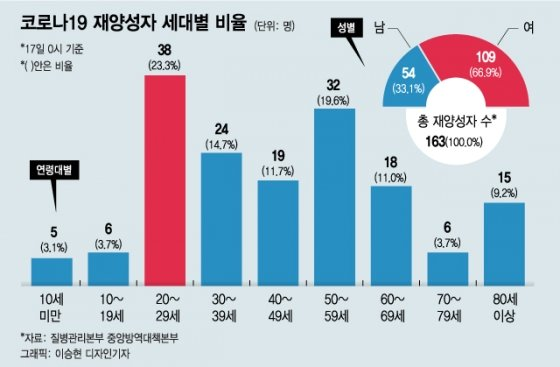
https://news.mt.co.kr/mtview.php?no=2020041714043594627
심지어 코로나 다시 걸리는 비율도 20대가 가장 많은 것을 확인할 수 있습니다.

# 1-3) 외부 자료 및 보도

위의 결과 외에도, 서울대학교 보건대학원 유명순 교수팀이 지난달 25~27일간 한국리서치에 의뢰해 진행한 [‘코로나19국민 인식조사’를 분석결과](https://news.joins.com/article/23751923)에 따르면, 20대의 코로나 바이러스에 대한 인식이 매우 낮다는 결과가 나왔습니다. 

그 뿐만 아니라, [4월 27일 질병관리본부에서 발표한 보도자료](https://www.cdc.go.kr/board/board.es?mid=a20501000000&bid=0015&list_no=367014&act=view)에 따르면 대구 확진자가 부산 클럽, 주점 및 숙박업소 등에 방문하며 143명의 접촉자가 발생했습니다.  

또한, 강남과 홍대 클럽이 개장하며 길게 줄서있는 모습, [자가격리 중 매일 스타벅스 간 20대 서초구 36번 확진자](https://www.nocutnews.co.kr/news/5325329) 등을 보았을 때, 20대들의 코로나에 대한 경각심과 인식이 부족한 경향이있습니다. 따라서,'나는 괜찮다'는 방식의 생각에서 벗어나 적극적으로 사회적 거리두기에 동참하고 유의하는 자세를 갖추어야합니다.

# 결론

코로나 종식 및 예방을 위해서는 <span style="color:red">해외 유입에 의한 확진자를 차단</span>하기해야합니다. 현재 입국자에 대한 검사 및 2주 자가격리 등 많은 노력이 진행되고 있습니다. 하지만, 그럼에도 유의사항을 잘 따르지 않는 일부 인원에 의해서 신천지와 같은 큰 집단 감염이 발생될 수 있다는 사실을 잊지 말아야합니다. 따라서, 코로나에 대한 경각심과 인식을 잘 심어주어야하며, 특히나 가장 안일하게 생각하는 20대의 인식 변화를 이끌어야 할 것입니다. 
또한, <span style="color:red">20대의 행동 패턴 및 방문 경로를 바탕으로 감염 위험이 있는 업종은 특히나 더욱 신경써서 사회적 거리두기, 마스크 착용, 손세정제와 손씻기 등을 더욱 권장</span>하도록 해야합니다.